In [1]:
from pathlib import Path

import pandas as pd

In [2]:
reports_path = Path("networks")
reports_path.mkdir(exist_ok=True, parents=True)

In [3]:
snapshot = 3  # <- change me to obtain egde list from another snapshot

ego_net_path = Path(f"networks/ego_edges/{snapshot}_ego_edges.csv")
course_net_path = Path(f"networks/course_edges/{snapshot}_course_edges.csv")

nodes_path = Path(f"networks/{snapshot}_nodes.csv")

In [4]:
nodes_df = pd.read_csv(nodes_path, index_col=0)
nodes_df.head()

,node_id,cicle_others_TL,psycho_TLmistakes,context_motivation,circle_friends_L2,metric_youngersiblings,cir_writingminday,metric_level gained,circle_partnerwithfamily_L1,circle_classmates_TL,...,psycho_otherlgsminday,living_sharing#sameL1,living_accommodation,psycho_TLstudyenjoyment,context_arrival_TLcountry,improv_gmr,living_communication_TL,psycho_mix_BAL2,cir_f2fpropTL,cir_writingpropL1
0,1,5.0,5.0,work & interests,0.0,9.0,NaN,2.0,15.0,5.0,...,920.0,yes,apartment,5.0,17409.0,3.0,no,5.0,55.0,50.0
1,2,10.0,4.0,work,5.0,0.0,20.0,3.0,40.0,0.0,...,250.0,yes,apartment,5.0,17409.0,4.0,no,2.0,40.0,75.0
2,3,15.0,1.0,study,0.0,1.0,15.0,3.0,0.0,15.0,...,5.0,yes,apartment,3.0,17409.0,3.0,no,1.0,25.0,50.0
3,4,0.0,5.0,interests & preferences,0.0,2.0,NaN,1.0,0.0,12.5,...,0.0,yes,apartment,5.0,17409.0,4.0,no,5.0,50.0,90.0
4,5,0.0,5.0,work,0.0,6.0,30.0,0.0,0.0,0.0,...,240.0,yes,apartment,5.0,17409.0,2.0,no,5.0,50.0,75.0


In [5]:
ego_edges = pd.read_csv(ego_net_path, index_col=0)
ego_edges.head()

,source,target,weight
0,2,6,1.0
1,2,4,0.2
2,2,39,0.4
3,2,19,0.6
4,2,28,0.8


In [6]:
course_edges = pd.read_csv(course_net_path, index_col=0)
course_edges.head()

,source,target,direction,intensity,lang_usage
0,1,32,out,1,0
1,1,39,out,4,0
2,1,34,in,4,0
3,1,41,out,0,0
4,1,8,out,5,0


In [7]:
new_edges = ego_edges.merge(course_edges, on=["source", "target"], how="left")
assert len(new_edges) == len(ego_edges)
new_edges = new_edges.drop("direction", axis=1)

## filter out egde list to quartiles

array([[<AxesSubplot: title={'center': 'lang_usage'}>]], dtype=object)

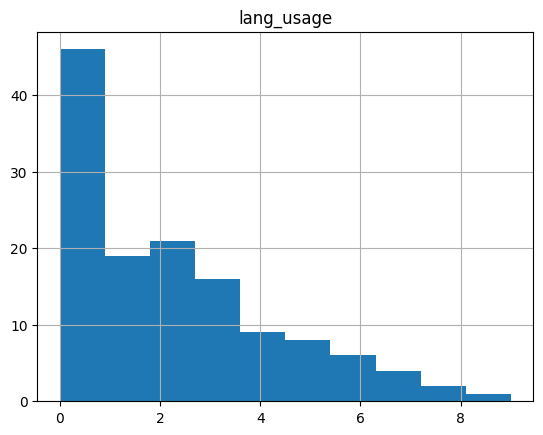

In [8]:
new_edges.hist("lang_usage")

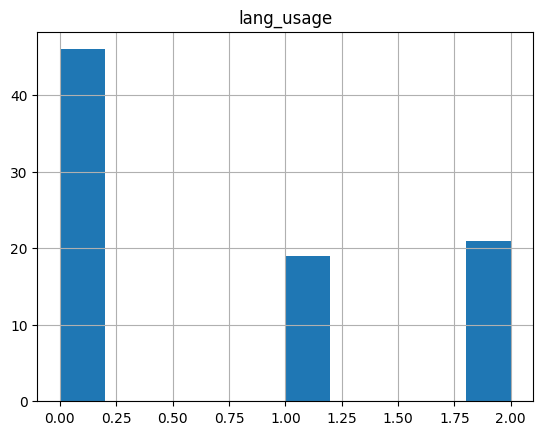

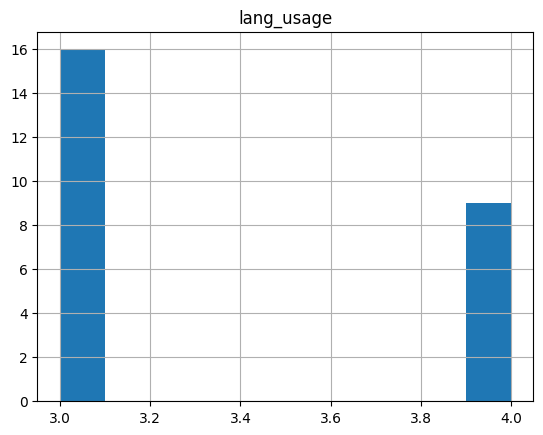

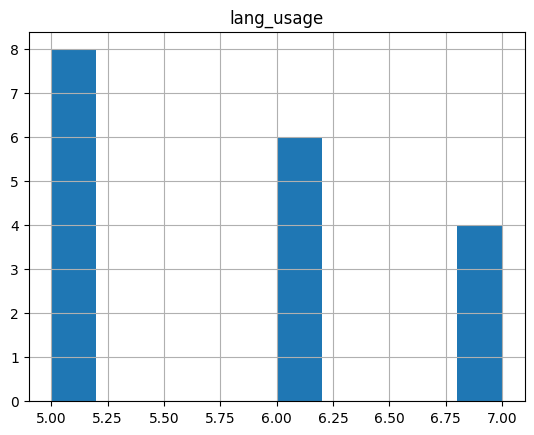

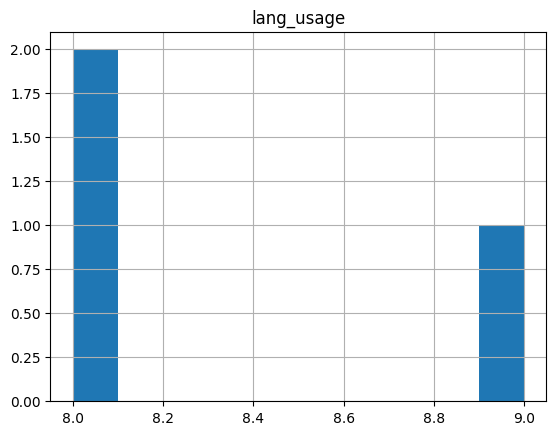

In [9]:
bins = [(0, 2.5), (2.5, 5), (5, 7.5), (7.5, 10)]
for quartile, bin in enumerate(bins):
    edge_slice = new_edges.loc[(new_edges["lang_usage"] < bin[1]) & (new_edges["lang_usage"] >= bin[0])]
    edge_slice.hist("lang_usage")

    csv_path = reports_path / f"tl{quartile}_edges"
    csv_path.mkdir(exist_ok=True, parents=True)

    edge_slice.to_csv(csv_path / f"{snapshot}_tl{quartile}_edges.csv")

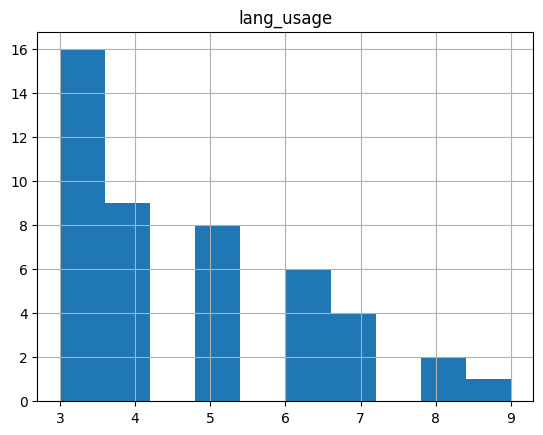

In [10]:
edge_slice = new_edges.loc[(new_edges["lang_usage"] >= 2.5)]
edge_slice.hist("lang_usage")

csv_path = reports_path / f"tl123_edges"
csv_path.mkdir(exist_ok=True, parents=True)
edge_slice.to_csv(csv_path / f"{snapshot}_tl123_edges.csv")